# Motor driver documentation
With an aim of controlling a total of 10 motors the number of PWM modules on the raspberry pi are insufficient for INDIVIDUAL control.
<br>
<br>
Thus, we first developed a simple module for PWM as an insurance if an alternative approach doesn't work. This exist in the pwm_example folder in firmware.

# An alternative approach for individualized control

The current alternative route being researched is using DMA as a PWM module.<br>
The idea behind this approach is to have a DMA reading constantly from a buffer defined in ram and outputting it to GPIO pins. <br>
Depending on the consistancy of this appraoch without timers we may not need any, but if we do for consistency, a timer will be used to define when the DMA transfers data from the buffer. <br>
The hope is to avoid the use of these timers however, as their cross usage with the OS could cause issues. <br>
Due to the presence of 16 DMA controllers, this appraoch provides a much more flexible implementation of our available PWM without using software PWM that could hog CPU usage. <br>
It is the developers choice to develop this program in assembly to make an externally callable C function. <br>
The code for this thus far looks as follows:

# Why is this code so complex?

There are a couple reasons this code is so aggrivating. The first is that memory on the pi is organized as thus:<br>
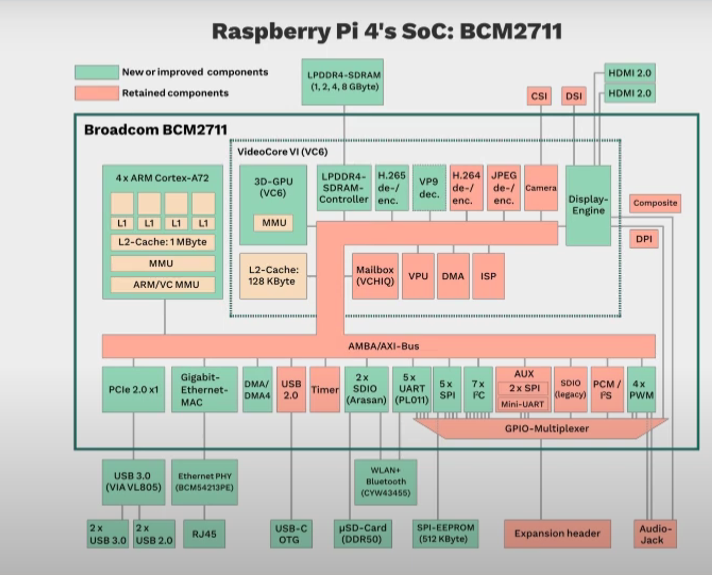


To really oversimplify that image: The orange components have legacy addresses, and new addresses. In order to manipulate them, depending on what component you are writing from (CPU or DMA for example) the address the component is at changes.  

Even worse, due to us using an overlaying linux kernel, most of the hardware peripherals are not accessable through the virtual memory space as easily due to the OS determining where to run our program. As such, we need to translate the physical memory space into our program using mmap and dev files provided by the raspberry pi os.